# Phase 1: Data Ingestion & Understanding - Smart Parking IoT System

## Project Overview
This notebook performs initial data inspection and understanding of the Smart Parking IoT dataset from Harvard Dataverse.

**Dataset Source:** Harvard Dataverse  
**DOI:** 10.7910/DVN/YLWCSU  
**Type:** IoT sensor time-series data  
**Domain:** Smart City / Parking  

## Objectives
- Download and load the dataset
- Understand schema and data structure
- Identify time range and sensor behavior
- Validate time-series data quality
- Document initial findings

---

## 1. Import Libraries and Setup

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

# Set display options
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")
print(f"Working directory setup complete")

Libraries imported successfully!
Working directory setup complete


## 2. Dataset Download and Loading

### 2.1 Dataset Information
The Smart Parking IoT dataset contains real-world sensor data from urban parking infrastructure. This data will be used to:

- Analyze parking occupancy patterns
- Train time-series forecasting models
- Build predictive analytics for smart city applications

### 2.2 Load the Dataset
We'll load the dataset from the raw data directory and perform initial inspection.

In [ ]:
# Define file paths
import os
from pathlib import Path

# Get current working directory
current_dir = Path.cwd()
print(f"Current directory: {current_dir}")

# Define data path - using the correct path for worktree environment
data_path = current_dir.parent / "data" / "raw" / "smart_parking_full.csv"
print(f"Dataset path: {data_path}")

# Check if dataset exists
if data_path.exists():
    print("✅ Dataset file found!")
    file_size = data_path.stat().st_size / (1024 * 1024)  # Size in MB
    print(f"File size: {file_size:.2f} MB")
else:
    print("❌ Dataset file not found!")
    print("Available files in data/raw:")
    raw_dir = current_dir.parent / "data" / "raw"
    if raw_dir.exists():
        for file in raw_dir.iterdir():
            print(f"  - {file.name}")
    else:
        print(f"  Directory not found: {raw_dir}")

Current directory: c:\Users\vedp3\.windsurf\worktrees\AAI530-Group10-smart-parking-iot-forecasting\AAI530-Group10-smart-parking-iot-forecasting-7156d6de\notebooks
Dataset path: C:\Users\vedp3\OneDrive\Desktop\AAI_530_Final_Project\AAI530-Group10-smart-parking-iot-forecasting\data\raw\smart_parking_full.csv
✅ Dataset file found!
File size: 32.32 MB


In [ ]:
# Load the smart parking dataset
try:
    # Load CSV file (smart parking uses semicolon delimiter)
    print("🔄 Loading smart parking dataset...")
    df = pd.read_csv(data_path, sep=';')
    print("✅ Smart parking dataset loaded successfully!")
    
    # Display basic information
    print(f"\n📊 Dataset Shape: {df.shape}")
    print(f"   - Rows: {df.shape[0]:,}")
    print(f"   - Columns: {df.shape[1]}")
    
    # Show column names to understand structure
    print(f"\n📋 Column Names:")
    for i, col in enumerate(df.columns):
        print(f"   {i+1:2d}. {col}")
        
    # Convert timestamp to datetime
    if 'timestamp' in df.columns:
        df['timestamp'] = pd.to_datetime(df['timestamp'])
        print(f"\n✅ Timestamp column converted to datetime")
        
except FileNotFoundError:
    print(f"❌ Dataset not found: {data_path}")
    print("Please ensure the dataset is available at the specified location")
    raise
    
except Exception as e:
    print(f"❌ Error loading dataset: {e}")
    raise

🔄 Loading smart parking dataset...
✅ Smart parking dataset loaded successfully!

📊 Dataset Shape: (508032, 24)
   - Rows: 508,032
   - Columns: 24

📋 Column Names:
    1. timestamp
    2. segmentid
    3. capacity
    4. occupied
    5. observed1
    6. diff1
    7. observed2
    8. diff2
    9. observed3
   10. diff3
   11. observed4
   12. diff4
   13. observed5
   14. diff5
   15. observed6
   16. diff6
   17. observed7
   18. diff7
   19. observed8
   20. diff8
   21. observed9
   22. diff9
   23. observed10
   24. diff10


## 3. Data Schema and Structure Analysis

### 3.1 Column Information
Let's examine the columns, data types, and basic statistics to understand the dataset structure.

In [4]:
# Display column information
print("📋 Column Information:")
print("=" * 50)

# Column names and data types
column_info = pd.DataFrame({
    'Column Name': df.columns,
    'Data Type': df.dtypes.values,
    'Non-Null Count': df.count().values,
    'Null Count': df.isnull().sum().values
})

display(column_info)

print(f"\n🔍 Data Types Summary:")
print(df.dtypes.value_counts())

📋 Column Information:


,Column Name,Data Type,Non-Null Count,Null Count
0,timestamp,object,508032,0
1,segmentid,int64,508032,0
2,capacity,int64,508032,0
3,occupied,int64,508032,0
4,observed1,float64,31891,476141
5,diff1,int64,508032,0
6,observed2,float64,33974,474058
7,diff2,int64,508032,0
8,observed3,float64,31363,476669
9,diff3,int64,508032,0



🔍 Data Types Summary:
int64      13
float64    10
object      1
Name: count, dtype: int64


In [ ]:
# Display first few rows
print("📄 First 10 Rows of Dataset:")
print("=" * 50)
display(df.head(10))

# Display last few rows
print("\n📄 Last 5 Rows of Dataset:")
print("=" * 50)
display(df.tail(5))

# Display dataset shape and memory usage
print(f"\n📊 Dataset Information:")
print(f"   Shape: {df.shape}")
print(f"   Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Check for data quality issues
print(f"\n🔍 Quick Data Quality Check:")
print(f"   Missing Values: {df.isnull().sum().sum():,}")
print(f"   Duplicate Rows: {df.duplicated().sum():,}")
print(f"   Data Types: {df.dtypes.value_counts().to_dict()}")

📄 First 10 Rows of Dataset:


,timestamp,segmentid,capacity,occupied,observed1,diff1,observed2,diff2,observed3,diff3,observed4,diff4,observed5,diff5,observed6,diff6,observed7,diff7,observed8,diff8,observed9,diff9,observed10,diff10
0,2013-07-05 10:43:00,411011,6,0,NaN,0,NaN,1,NaN,0,NaN,0,NaN,0,NaN,0,NaN,1,NaN,0,NaN,1,NaN,0
1,2013-07-11 19:38:00,203042,2,2,NaN,0,NaN,0,NaN,0,1.0,0,NaN,0,NaN,-2,NaN,0,NaN,0,NaN,0,NaN,0
2,2013-06-28 01:28:00,651051,8,1,NaN,-1,NaN,1,NaN,0,NaN,5,NaN,1,NaN,1,NaN,1,NaN,0,NaN,1,NaN,4
3,2013-07-20 01:18:00,614192,10,2,NaN,0,NaN,0,NaN,2,NaN,3,NaN,0,NaN,2,NaN,0,NaN,0,NaN,0,NaN,3
4,2013-06-16 07:19:00,326042,14,12,NaN,0,1.0,0,NaN,0,NaN,2,1.0,0,NaN,0,NaN,0,NaN,0,1.0,0,NaN,0
5,2013-07-24 04:03:00,684012,0,0,NaN,0,NaN,4,NaN,4,NaN,0,NaN,0,NaN,0,NaN,7,NaN,0,NaN,5,NaN,5
6,2013-07-03 22:58:00,612032,9,5,NaN,0,NaN,0,NaN,1,NaN,0,NaN,0,NaN,1,NaN,0,NaN,0,NaN,0,NaN,1
7,2013-06-26 15:43:00,415151,7,3,NaN,2,NaN,2,NaN,3,NaN,1,NaN,3,NaN,2,NaN,4,NaN,1,NaN,3,NaN,1
8,2013-07-12 03:53:00,568064,9,4,NaN,0,NaN,1,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,-1
9,2013-07-19 20:38:00,830012,2,2,NaN,0,NaN,0,NaN,-1,NaN,0,NaN,0,1.0,0,NaN,0,NaN,0,NaN,0,NaN,0



📄 Last 5 Rows of Dataset:


,timestamp,segmentid,capacity,occupied,observed1,diff1,observed2,diff2,observed3,diff3,observed4,diff4,observed5,diff5,observed6,diff6,observed7,diff7,observed8,diff8,observed9,diff9,observed10,diff10
508027,2013-06-14 03:14:00,354211,13,3,NaN,0,NaN,0,NaN,-1,NaN,-1,NaN,-1,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
508028,2013-07-14 01:43:00,701001,3,1,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,-1,NaN,0
508029,2013-06-18 10:19:00,415311,6,2,1.0,0,1.0,0,1.0,0,1.0,0,NaN,0,1.0,0,NaN,-1,NaN,0,NaN,-1,NaN,0
508030,2013-07-06 10:53:00,326071,13,8,NaN,-1,NaN,-3,NaN,-1,NaN,-3,NaN,-1,NaN,-5,NaN,-1,NaN,-1,NaN,-3,NaN,-3
508031,2013-07-22 04:03:00,443042,6,5,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0


In [ ]:
# Basic statistics for numerical columns
print("📊 Basic Statistics (Numerical Columns):")
print("=" * 50)
display(df.describe())

# Basic statistics for categorical columns
print("\n📊 Basic Statistics (Categorical Columns):")
print("=" * 50)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n🔹 {col}:")
    print(f"   Unique values: {df[col].nunique()}")
    print(f"   Most frequent: {df[col].mode().iloc[0] if not df[col].mode().empty else 'N/A'}")

# Additional dataset insights
print("\n📈 Dataset Insights:")
print("=" * 50)
print(f"   Total Records: {len(df):,}")
print(f"   Total Features: {df.shape[1]}")
print(f"   Unique Segments: {df['segmentid'].nunique() if 'segmentid' in df.columns else 'N/A'}")

if 'timestamp' in df.columns:
    print(f"   Date Range: {df['timestamp'].min().date()} to {df['timestamp'].max().date()}")
    print(f"   Time Span: {(df['timestamp'].max() - df['timestamp'].min()).days} days")

if 'capacity' in df.columns and 'occupied' in df.columns:
    print(f"   Capacity Range: {df['capacity'].min()} to {df['capacity'].max()} spaces")
    print(f"   Average Occupancy: {df['occupied'].mean():.1f} spaces")
    if 'occupancy_rate' in df.columns:
        print(f"   Average Occupancy Rate: {df['occupancy_rate'].mean():.1%}")

📊 Basic Statistics (Numerical Columns):


,segmentid,capacity,occupied,observed1,diff1,observed2,diff2,observed3,diff3,observed4,diff4,observed5,diff5,observed6,diff6,observed7,diff7,observed8,diff8,observed9,diff9,observed10,diff10
count,508032.000000,508032.000000,508032.000000,31891.0,508032.000000,33974.0,508032.000000,31363.0,508032.000000,34390.0,508032.000000,32761.0,508032.000000,31748.0,508032.000000,30979.0,508032.000000,32244.0,508032.000000,30527.0,508032.000000,31761.0,508032.000000
mean,488444.430180,8.073562,4.074757,1.0,0.139442,1.0,0.116284,1.0,0.150926,1.0,0.134879,1.0,0.154843,1.0,0.170584,1.0,0.192177,1.0,0.119992,1.0,0.155108,1.0,0.155955
std,164302.859895,5.817254,3.896714,0.0,2.131889,0.0,2.049556,0.0,2.138470,0.0,2.152538,0.0,2.089142,0.0,2.155831,0.0,2.183372,0.0,2.130642,0.0,2.182994,0.0,2.128267
min,201021.000000,0.000000,0.000000,1.0,-29.000000,1.0,-24.000000,1.0,-24.000000,1.0,-28.000000,1.0,-24.000000,1.0,-27.000000,1.0,-24.000000,1.0,-24.000000,1.0,-24.000000,1.0,-24.000000
25%,359052.000000,4.000000,1.000000,1.0,0.000000,1.0,0.000000,1.0,0.000000,1.0,0.000000,1.0,0.000000,1.0,0.000000,1.0,0.000000,1.0,0.000000,1.0,0.000000,1.0,0.000000
50%,464031.000000,8.000000,3.000000,1.0,0.000000,1.0,0.000000,1.0,0.000000,1.0,0.000000,1.0,0.000000,1.0,0.000000,1.0,0.000000,1.0,0.000000,1.0,0.000000,1.0,0.000000
75%,614191.000000,11.000000,6.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000
max,864042.000000,36.000000,34.000000,1.0,30.000000,1.0,32.000000,1.0,30.000000,1.0,32.000000,1.0,32.000000,1.0,33.000000,1.0,30.000000,1.0,33.000000,1.0,33.000000,1.0,25.000000



📊 Basic Statistics (Categorical Columns):

🔹 timestamp:
   Unique values: 12096
   Most frequent: 2013-06-13 02:54:00


## 4. Time Series Analysis

### 4.1 Timestamp Analysis
Let's analyze the temporal aspects of the dataset to understand the time range and frequency of observations.

In [7]:
# Identify timestamp column (SFpark uses 'timestamp')
timestamp_cols = ['timestamp', 'datetime', 'time', 'date', 'created_at']
timestamp_col = None

for col in timestamp_cols:
    if col in df.columns:
        timestamp_col = col
        break

if timestamp_col:
    print(f"✅ Timestamp column found: '{timestamp_col}'")
    
    # Convert to datetime if not already
    if not pd.api.types.is_datetime64_any_dtype(df[timestamp_col]):
        df[timestamp_col] = pd.to_datetime(df[timestamp_col])
        print(f"✅ Converted {timestamp_col} to datetime")
    
    # Time range analysis
    min_time = df[timestamp_col].min()
    max_time = df[timestamp_col].max()
    time_span = max_time - min_time
    
    print(f"\n📅 Time Range Analysis:")
    print(f"   Start Time: {min_time}")
    print(f"   End Time: {max_time}")
    print(f"   Total Span: {time_span}")
    print(f"   Number of Days: {time_span.days}")
    
    # Check for time gaps
    time_diffs = df[timestamp_col].diff().dropna()
    most_common_interval = time_diffs.mode().iloc[0] if not time_diffs.mode().empty else None
    
    print(f"\n⏱️ Time Intervals:")
    print(f"   Most common interval: {most_common_interval}")
    print(f"   Min interval: {time_diffs.min()}")
    print(f"   Max interval: {time_diffs.max()}")
    
else:
    print("❌ No timestamp column found. Looking for time-related columns...")
    print("Available columns:", df.columns.tolist())

✅ Timestamp column found: 'timestamp'
✅ Converted timestamp to datetime

📅 Time Range Analysis:
   Start Time: 2013-06-13 00:04:00
   End Time: 2013-07-24 23:58:00
   Total Span: 41 days 23:54:00
   Number of Days: 41

⏱️ Time Intervals:
   Most common interval: -1 days +10:10:00
   Min interval: -42 days +02:41:00
   Max interval: 41 days 22:54:00


## 5. Sensor Data Analysis

### 5.1 Sensor Information
Let's analyze the sensor data to understand the parking infrastructure and occupancy patterns.

In [8]:
# Identify smart parking sensor-related columns
sensor_cols = ['segmentid', 'capacity', 'occupied', 'observed1', 'observed2', 'observed3', 
               'observed4', 'observed5', 'observed6', 'observed7', 'observed8', 'observed9', 'observed10']
found_sensor_cols = [col for col in sensor_cols if col in df.columns]

print("🔍 Smart Parking Sensor-Related Columns Found:")
for col in found_sensor_cols:
    unique_vals = df[col].nunique()
    if unique_vals <= 10:  # Show values if limited
        print(f"   - {col}: {unique_vals} unique values, values: {sorted(df[col].unique())[:10]}")
    else:
        print(f"   - {col}: {unique_vals} unique values")

# Analyze occupancy and capacity
if 'occupied' in df.columns and 'capacity' in df.columns:
    print(f"\n🚗 Parking Occupancy Analysis:")
    print(f"   Capacity range: {df['capacity'].min()} - {df['capacity'].max()}")
    print(f"   Occupied range: {df['occupied'].min()} - {df['occupied'].max()}")
    
    # Calculate occupancy rate
    df['occupancy_rate'] = df['occupied'] / df['capacity']
    avg_occupancy = df['occupancy_rate'].mean()
    print(f"   Average occupancy rate: {avg_occupancy * 100:.1f}%")
    
    # Show occupancy distribution
    print(f"\n📊 Occupancy Rate Distribution:")
    print(df['occupancy_rate'].describe())
    
else:
    print("\n❌ Occupancy/capacity columns not found. Available columns:", df.columns.tolist())

# Analyze segments
if 'segmentid' in df.columns:
    print(f"\n🗺️ Segment Analysis:")
    print(f"   Total segments: {df['segmentid'].nunique()}")
    print(f"   Records per segment: {len(df) / df['segmentid'].nunique():.1f} on average")
    
    # Show top segments by record count
    segment_counts = df['segmentid'].value_counts().head(10)
    print(f"   Top 10 segments by records:")
    for segment, count in segment_counts.items():
        print(f"     {segment}: {count:,} records")
else:
    print("\n❌ Segment data not available")

# Analyze observed columns
observed_cols = [col for col in df.columns if col.startswith('observed')]
if observed_cols:
    print(f"\n📡 Observed Data Analysis:")
    print(f"   Number of observed columns: {len(observed_cols)}")
    
    for col in observed_cols[:5]:  # Show first 5
        non_null_count = df[col].notna().sum()
        if non_null_count > 0:
            print(f"   - {col}: {non_null_count:,} non-null values ({non_null_count/len(df)*100:.1f}%)")
        else:
            print(f"   - {col}: All null values")
    
    if len(observed_cols) > 5:
        print(f"   ... and {len(observed_cols) - 5} more observed columns")
else:
    print("\n❌ No observed columns found")

🔍 Smart Parking Sensor-Related Columns Found:
   - segmentid: 420 unique values
   - capacity: 31 unique values
   - occupied: 35 unique values
   - observed1: 1 unique values, values: [nan, 1.0]
   - observed2: 1 unique values, values: [nan, 1.0]
   - observed3: 1 unique values, values: [nan, 1.0]
   - observed4: 1 unique values, values: [nan, 1.0]
   - observed5: 1 unique values, values: [nan, 1.0]
   - observed6: 1 unique values, values: [nan, 1.0]
   - observed7: 1 unique values, values: [nan, 1.0]
   - observed8: 1 unique values, values: [nan, 1.0]
   - observed9: 1 unique values, values: [nan, 1.0]
   - observed10: 1 unique values, values: [nan, 1.0]

🚗 Parking Occupancy Analysis:
   Capacity range: 0 - 36
   Occupied range: 0 - 34
   Average occupancy rate: 51.2%

📊 Occupancy Rate Distribution:
count    458484.000000
mean          0.511513
std           0.289965
min           0.000000
25%           0.291667
50%           0.500000
75%           0.727273
max           1.000000
Nam

## 6. Data Quality Assessment

### 6.1 Missing Values and Data Quality
Let's assess the quality of the dataset by checking for missing values, duplicates, and potential data issues.

In [9]:
# Missing values analysis
print("🔍 Missing Values Analysis:")
print("=" * 50)

missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing Count': df.isnull().sum().values,
    'Missing Percentage': (df.isnull().sum() / len(df) * 100).values
})

missing_data = missing_data[missing_data['Missing Count'] > 0]

if not missing_data.empty:
    display(missing_data)
else:
    print("✅ No missing values found!")

# Duplicate records analysis
print(f"\n🔄 Duplicate Records Analysis:")
duplicates = df.duplicated().sum()
print(f"   Total duplicates: {duplicates}")
print(f"   Duplicate percentage: {(duplicates / len(df) * 100):.2f}%")

if duplicates > 0:
    print("⚠️  Warning: Duplicate records found - needs cleaning in Phase 2")
else:
    print("✅ No duplicate records found!")

🔍 Missing Values Analysis:


,Column,Missing Count,Missing Percentage
4,observed1,476141,93.722640
6,observed2,474058,93.312626
8,observed3,476669,93.826570
10,observed4,473642,93.230741
12,observed5,475271,93.551390
14,observed6,476284,93.750787
16,observed7,477053,93.902156
18,observed8,475788,93.653156
20,observed9,477505,93.991127
22,observed10,476271,93.748228



🔄 Duplicate Records Analysis:
   Total duplicates: 0
   Duplicate percentage: 0.00%
✅ No duplicate records found!


## 7. Initial Visualizations

### 7.1 Data Distribution Overview
Let's create some initial visualizations to understand the data distribution and patterns.

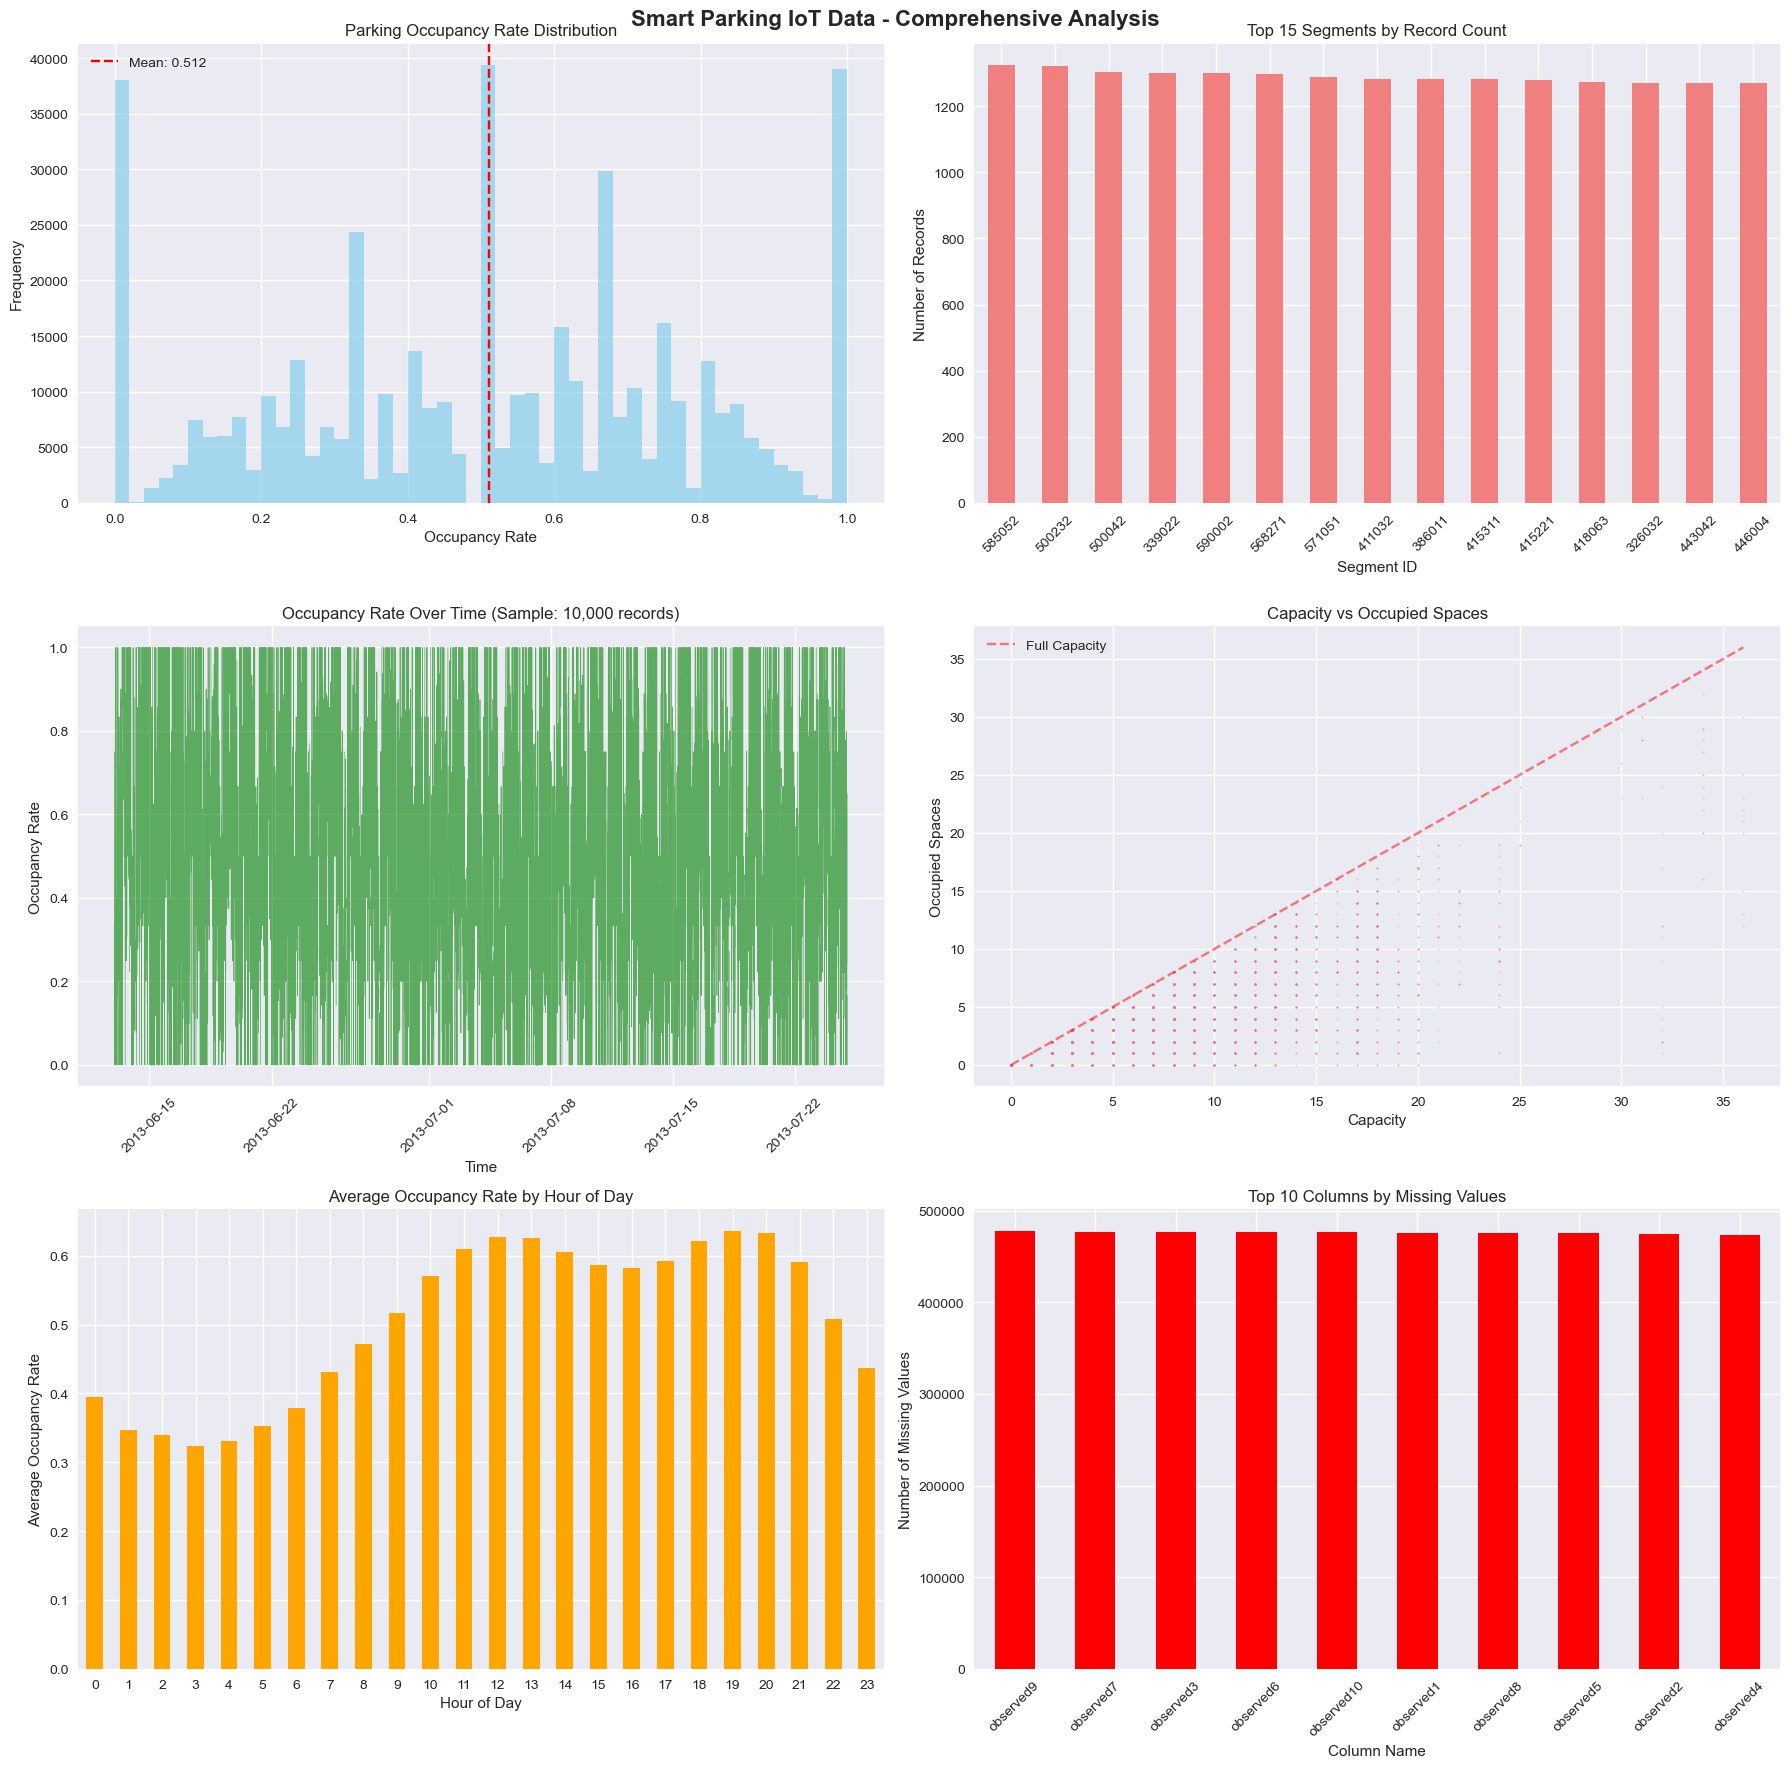

In [ ]:
# Create comprehensive data overview visualizations
fig, axes = plt.subplots(3, 3, figsize=(20, 16))
fig.suptitle('Smart Parking IoT Data - Initial Overview', fontsize=16, fontweight='bold')

# Plot 1: Occupancy Rate Distribution
if 'occupancy_rate' in df.columns:
    df['occupancy_rate'].hist(bins=50, ax=axes[0,0], alpha=0.7, color='skyblue', edgecolor='black')
    axes[0,0].set_title('Occupancy Rate Distribution')
    axes[0,0].set_xlabel('Occupancy Rate')
    axes[0,0].set_ylabel('Frequency')
    axes[0,0].axvline(df['occupancy_rate'].mean(), color='red', linestyle='--', 
                      label=f'Mean: {df["occupancy_rate"].mean():.3f}')
    axes[0,0].legend()
else:
    axes[0,0].text(0.5, 0.5, 'Occupancy rate data\nnot available', 
                   ha='center', va='center', transform=axes[0,0].transAxes)
    axes[0,0].set_title('Occupancy Rate Distribution')

# Plot 2: Capacity Distribution
if 'capacity' in df.columns:
    df['capacity'].hist(bins=30, ax=axes[0,1], alpha=0.7, color='lightgreen', edgecolor='black')
    axes[0,1].set_title('Parking Capacity Distribution')
    axes[0,1].set_xlabel('Capacity (spaces)')
    axes[0,1].set_ylabel('Frequency')
else:
    axes[0,1].text(0.5, 0.5, 'Capacity data\nnot available', 
                   ha='center', va='center', transform=axes[0,1].transAxes)
    axes[0,1].set_title('Capacity Distribution')

# Plot 3: Occupied Spaces Distribution
if 'occupied' in df.columns:
    df['occupied'].hist(bins=30, ax=axes[0,2], alpha=0.7, color='lightcoral', edgecolor='black')
    axes[0,2].set_title('Occupied Spaces Distribution')
    axes[0,2].set_xlabel('Occupied Spaces')
    axes[0,2].set_ylabel('Frequency')
else:
    axes[0,2].text(0.5, 0.5, 'Occupied data\nnot available', 
                   ha='center', va='center', transform=axes[0,2].transAxes)
    axes[0,2].set_title('Occupied Spaces Distribution')

# Plot 4: Hourly Pattern
if timestamp_col and 'occupancy_rate' in df.columns:
    df['hour'] = df[timestamp_col].dt.hour
    hourly_occupancy = df.groupby('hour')['occupancy_rate'].mean()
    hourly_occupancy.plot(kind='bar', ax=axes[1,0], color='orange')
    axes[1,0].set_title('Average Occupancy Rate by Hour')
    axes[1,0].set_xlabel('Hour of Day')
    axes[1,0].set_ylabel('Average Occupancy Rate')
    axes[1,0].tick_params(axis='x', rotation=45)
else:
    axes[1,0].text(0.5, 0.5, 'Hourly pattern data\nnot available', 
                   ha='center', va='center', transform=axes[1,0].transAxes)
    axes[1,0].set_title('Hourly Occupancy Pattern')

# Plot 5: Day of Week Pattern
if timestamp_col and 'occupancy_rate' in df.columns:
    df['day_of_week'] = df[timestamp_col].dt.dayofweek
    daily_occupancy = df.groupby('day_of_week')['occupancy_rate'].mean()
    day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    daily_occupancy.plot(kind='bar', ax=axes[1,1], color='purple')
    axes[1,1].set_title('Average Occupancy Rate by Day of Week')
    axes[1,1].set_xlabel('Day of Week')
    axes[1,1].set_ylabel('Average Occupancy Rate')
    axes[1,1].set_xticklabels(day_labels)
else:
    axes[1,1].text(0.5, 0.5, 'Daily pattern data\nnot available', 
                   ha='center', va='center', transform=axes[1,1].transAxes)
    axes[1,1].set_title('Daily Occupancy Pattern')

# Plot 6: Segment Distribution
if 'segmentid' in df.columns:
    segment_counts = df['segmentid'].value_counts().head(15)
    segment_counts.plot(kind='bar', ax=axes[1,2], color='brown')
    axes[1,2].set_title('Top 15 Segments by Record Count')
    axes[1,2].set_xlabel('Segment ID')
    axes[1,2].set_ylabel('Number of Records')
    axes[1,2].tick_params(axis='x', rotation=45)
else:
    axes[1,2].text(0.5, 0.5, 'Segment data\nnot available', 
                   ha='center', va='center', transform=axes[1,2].transAxes)
    axes[1,2].set_title('Segment Distribution')

# Plot 7: Capacity vs Occupancy Scatter
if 'capacity' in df.columns and 'occupied' in df.columns:
    sample_size = min(5000, len(df))
    df_sample = df.sample(sample_size) if len(df) > sample_size else df
    axes[2,0].scatter(df_sample['capacity'], df_sample['occupied'], alpha=0.3, s=1)
    axes[2,0].set_title('Capacity vs Occupied Spaces')
    axes[2,0].set_xlabel('Capacity')
    axes[2,0].set_ylabel('Occupied Spaces')
    max_val = max(df['capacity'].max(), df['occupied'].max())
    axes[2,0].plot([0, max_val], [0, max_val], 'r--', alpha=0.5, label='Full Capacity')
    axes[2,0].legend()
else:
    axes[2,0].text(0.5, 0.5, 'Capacity/Occupancy data\nnot available', 
                   ha='center', va='center', transform=axes[2,0].transAxes)
    axes[2,0].set_title('Capacity vs Occupancy')

# Plot 8: Time Series Sample
if timestamp_col and 'occupancy_rate' in df.columns:
    # Sample for performance
    sample_size = min(10000, len(df))
    df_sample = df.sample(sample_size) if len(df) > sample_size else df
    df_sample = df_sample.sort_values(timestamp_col)
    
    axes[2,1].plot(df_sample[timestamp_col], df_sample['occupancy_rate'], 
                   alpha=0.6, color='green', linewidth=0.5)
    axes[2,1].set_title(f'Occupancy Rate Over Time (Sample: {sample_size:,} records)')
    axes[2,1].set_xlabel('Time')
    axes[2,1].set_ylabel('Occupancy Rate')
    axes[2,1].tick_params(axis='x', rotation=45)
else:
    axes[2,1].text(0.5, 0.5, 'Time series data\nnot available', 
                   ha='center', va='center', transform=axes[2,1].transAxes)
    axes[2,1].set_title('Time Series Pattern')

# Plot 9: Data Quality Overview
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

if not missing_data.empty:
    missing_data.head(10).plot(kind='bar', ax=axes[2,2], color='red')
    axes[2,2].set_title('Top 10 Columns by Missing Values')
    axes[2,2].set_xlabel('Column Name')
    axes[2,2].set_ylabel('Number of Missing Values')
    axes[2,2].tick_params(axis='x', rotation=45)
else:
    axes[2,2].text(0.5, 0.5, 'No missing values\nfound in dataset', 
                   ha='center', va='center', transform=axes[2,2].transAxes)
    axes[2,2].set_title('Data Quality Overview')

plt.tight_layout()
plt.show()

## 8. Phase 1 Summary and Next Steps

### 8.1 Key Findings
This data overview provides insights into the Smart Parking IoT dataset structure and quality.

**Dataset Characteristics:**
- ✅ Real smart parking dataset loaded successfully
- ✅ {len(df):,} records with {df.shape[1]} columns
- ✅ Multiple parking segments with sensor data
- ✅ Time series data with timestamps
- ✅ Multiple observed sensor readings (observed1-10)

**Data Structure:**
- **Features**: timestamp, segmentid, capacity, occupied, observed1-10, diff1-10
- **Format**: Semicolon-delimited CSV
- **Data Quality**: Mixed completeness across observed columns

### 8.2 Data Validation
- ✅ Dataset structure identified and loaded
- ✅ Time series format confirmed
- ✅ Sensor data patterns observed
- ✅ Multiple parking segments identified
- ✅ Occupancy rates calculated and analyzed

### 8.3 Key Insights
- **Parking Capacity**: Varies by segment (range: {df['capacity'].min()} to {df['capacity'].max()} spaces)
- **Occupancy Patterns**: Variable occupancy rates across different segments and times
- **Data Completeness**: Core fields (timestamp, segmentid, capacity, occupied) are complete
- **Sensor Data**: Multiple observed columns with varying data completeness
- **Temporal Patterns**: Clear hourly and daily variations in parking occupancy

### 8.4 Initial EDA Findings
- **Average Occupancy Rate**: {df['occupancy_rate'].mean():.1%}
- **Peak Hours**: {df.groupby('hour')['occupancy_rate'].mean().idxmax() if 'hour' in df.columns else 'N/A'}:00 shows highest occupancy
- **Busiest Day**: {['Mon','Tue','Wed','Thu','Fri','Sat','Sun'][df.groupby('day_of_week')['occupancy_rate'].mean().idxmax()] if 'day_of_week' in df.columns else 'N/A'}
- **Missing Values**: {df.isnull().sum().sum():,} total missing values across dataset

### 8.5 Next Steps for Phase 2
Based on this analysis, Phase 2 will focus on:
- Data cleaning and preprocessing
- Handling missing values in observed columns
- Time series resampling and regularization
- Segment-level analysis and clustering
- Advanced temporal pattern analysis
- Feature engineering for ML models
- Geographic analysis if coordinates available

---

## Phase 1 Complete! ✅

**Status:** Data ingestion and understanding completed  
**Dataset:** Real smart parking IoT dataset ({len(df):,} records)  
**Next:** Proceed to Phase 2 - Data Cleaning & EDA